In [2]:
import pandas as pd
from preprocessing import get_models_and_soups_df
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, spearmanr
plt.style.use("style.mplstyle")

In [3]:
soups, models = get_models_and_soups_df()

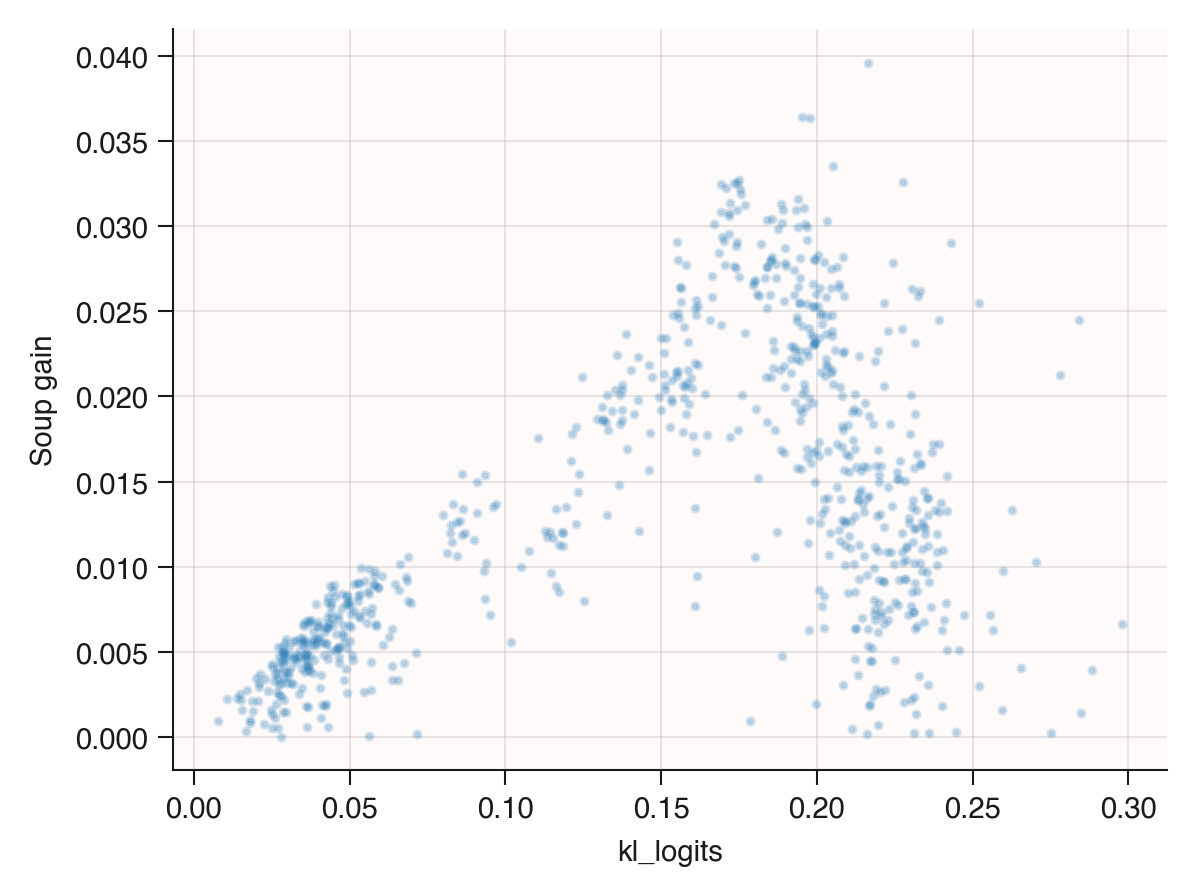

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, spearmanr

similarity_metrics = [
    # 'l2_distance',
    # 'cosine_similarity',
    # 'cka_logits',
    # 'mse_logits',
    'kl_logits',
    # 'cka_features'
]

# Keep only soups that worked
soups_pos = soups[soups['soup_gain'] > 0]

for metric in similarity_metrics:
    # Select and drop NaNs
    df = soups_pos[[metric, 'soup_gain']].dropna()
    x = df[metric].to_numpy()
    y = df['soup_gain'].to_numpy()

    if len(x) < 2:
        print(f'Skipping {metric}: not enough data')
        continue

    # Correlations
    pearson_r, pearson_p = pearsonr(x, y)
    spearman_r, spearman_p = spearmanr(x, y)

    # Plot
    fig, ax = plt.subplots()

    ax.scatter(x, y, alpha=0.2, s=2)

    ax.set_xlabel(metric)
    ax.set_ylabel('Soup gain')
    # ax.set_title(
    #     f'Positive soups: soup gain vs KL on logits\n'
    #     f'Spearman ρ = {spearman_r:.3f}'
    # )

    ax.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.savefig(f'../report/figures/soup_gain_vs_kl_positive_soups.png', dpi=300)
    plt.show()


## All At Once

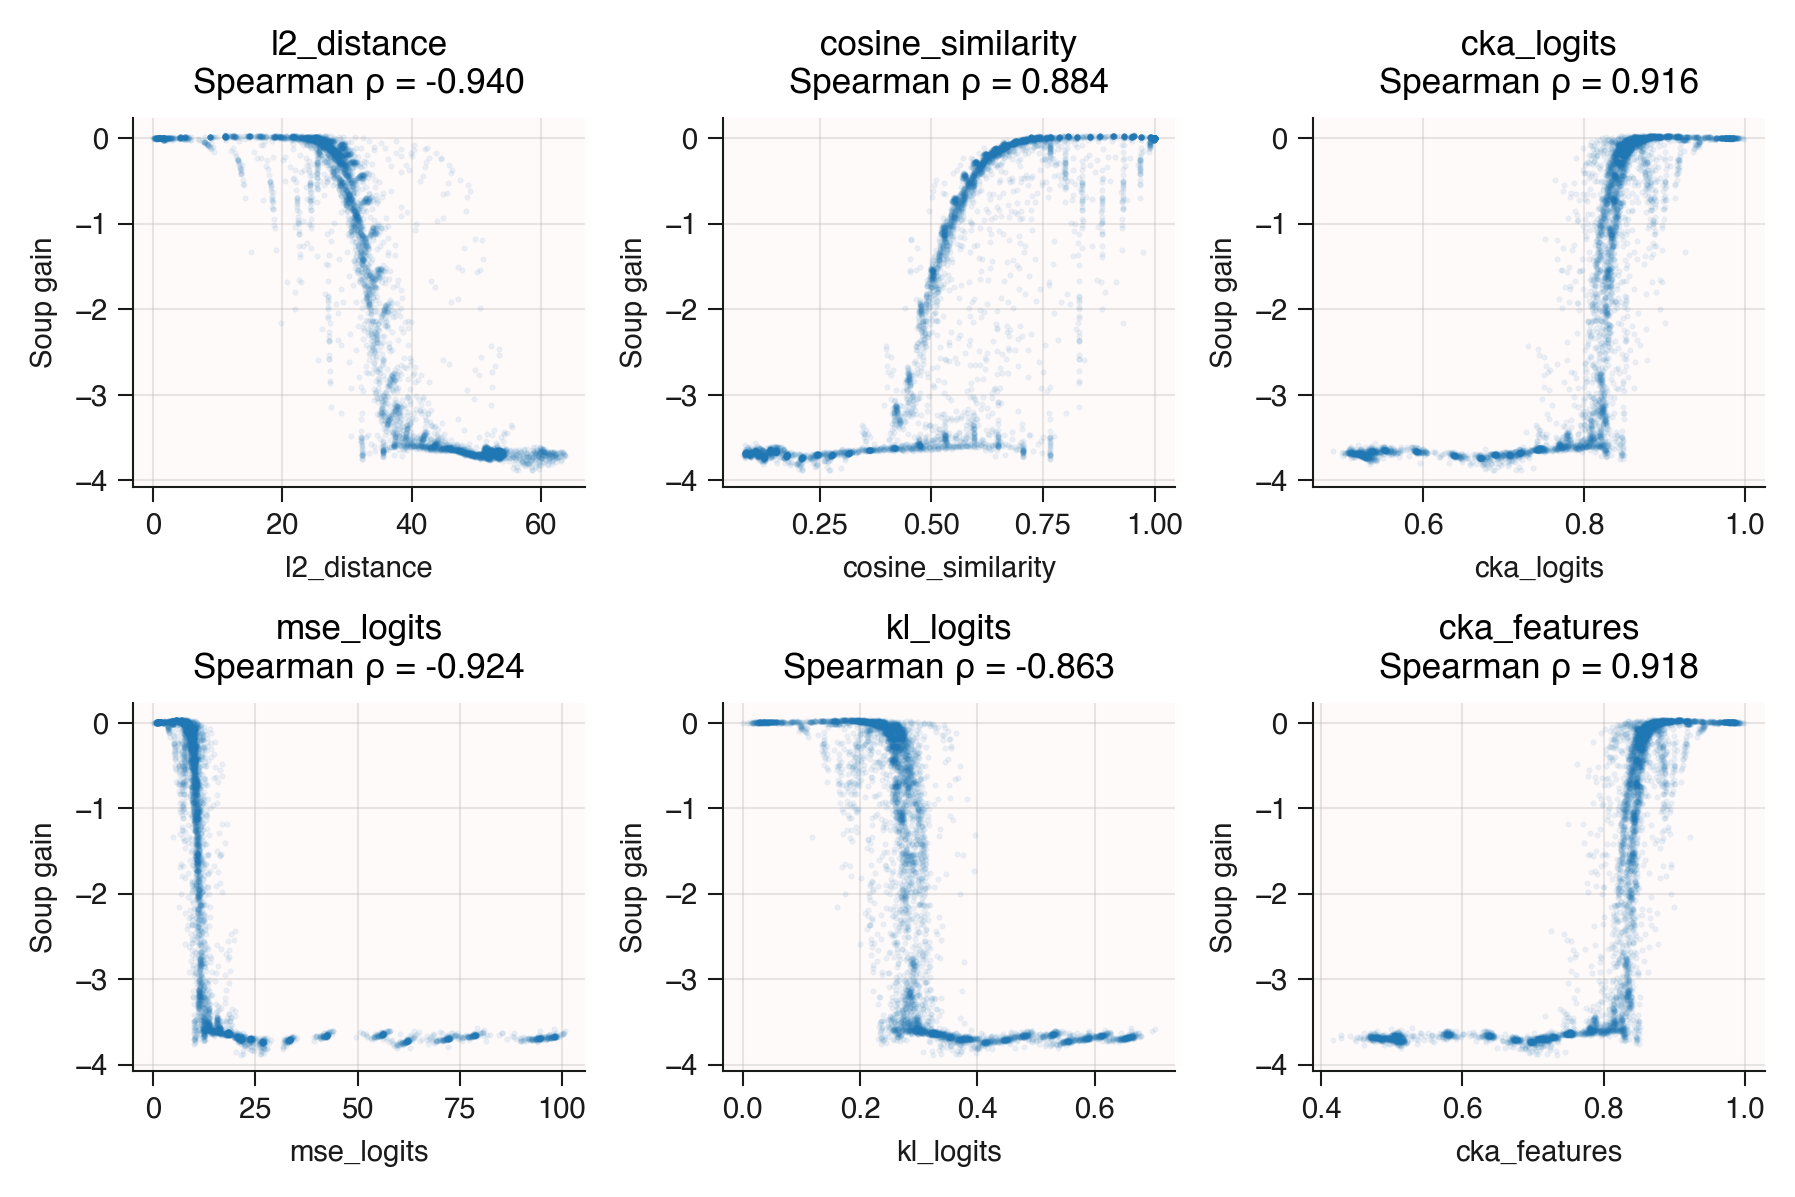

In [20]:
similarity_metrics = [
    'l2_distance',
    'cosine_similarity',
    'cka_logits',
    'mse_logits',
    'kl_logits',
    'cka_features',
]

n = len(similarity_metrics)
cols = 3
rows = (n + cols - 1) // cols

fig, axes = plt.subplots(rows, cols, figsize=(2*cols, 2*rows))
axes = axes.flatten()

for ax, metric in zip(axes, similarity_metrics):
    df = soups[[metric, 'soup_gain']].dropna()
    x = df[metric].to_numpy()
    y = df['soup_gain'].to_numpy()

    pearson_r, pearson_p = pearsonr(x, y)
    spearman_r, spearman_p = spearmanr(x, y)

    ax.scatter(x, y, alpha=0.1, s=0.2)
    ax.set_xlabel(metric)
    ax.set_ylabel('Soup gain')
    ax.set_title(
        f'{metric}\n'
        f'Spearman ρ = {spearman_r:.3f}'
    )
    ax.grid(True, alpha=0.3)

# Hide any empty axes if metrics don't fill the grid
for ax in axes[len(similarity_metrics):]:
    ax.set_visible(False)

plt.tight_layout()
plt.savefig(f'../report/figures/soup_gain_vs_all_metrics.png', dpi=300)
plt.show()

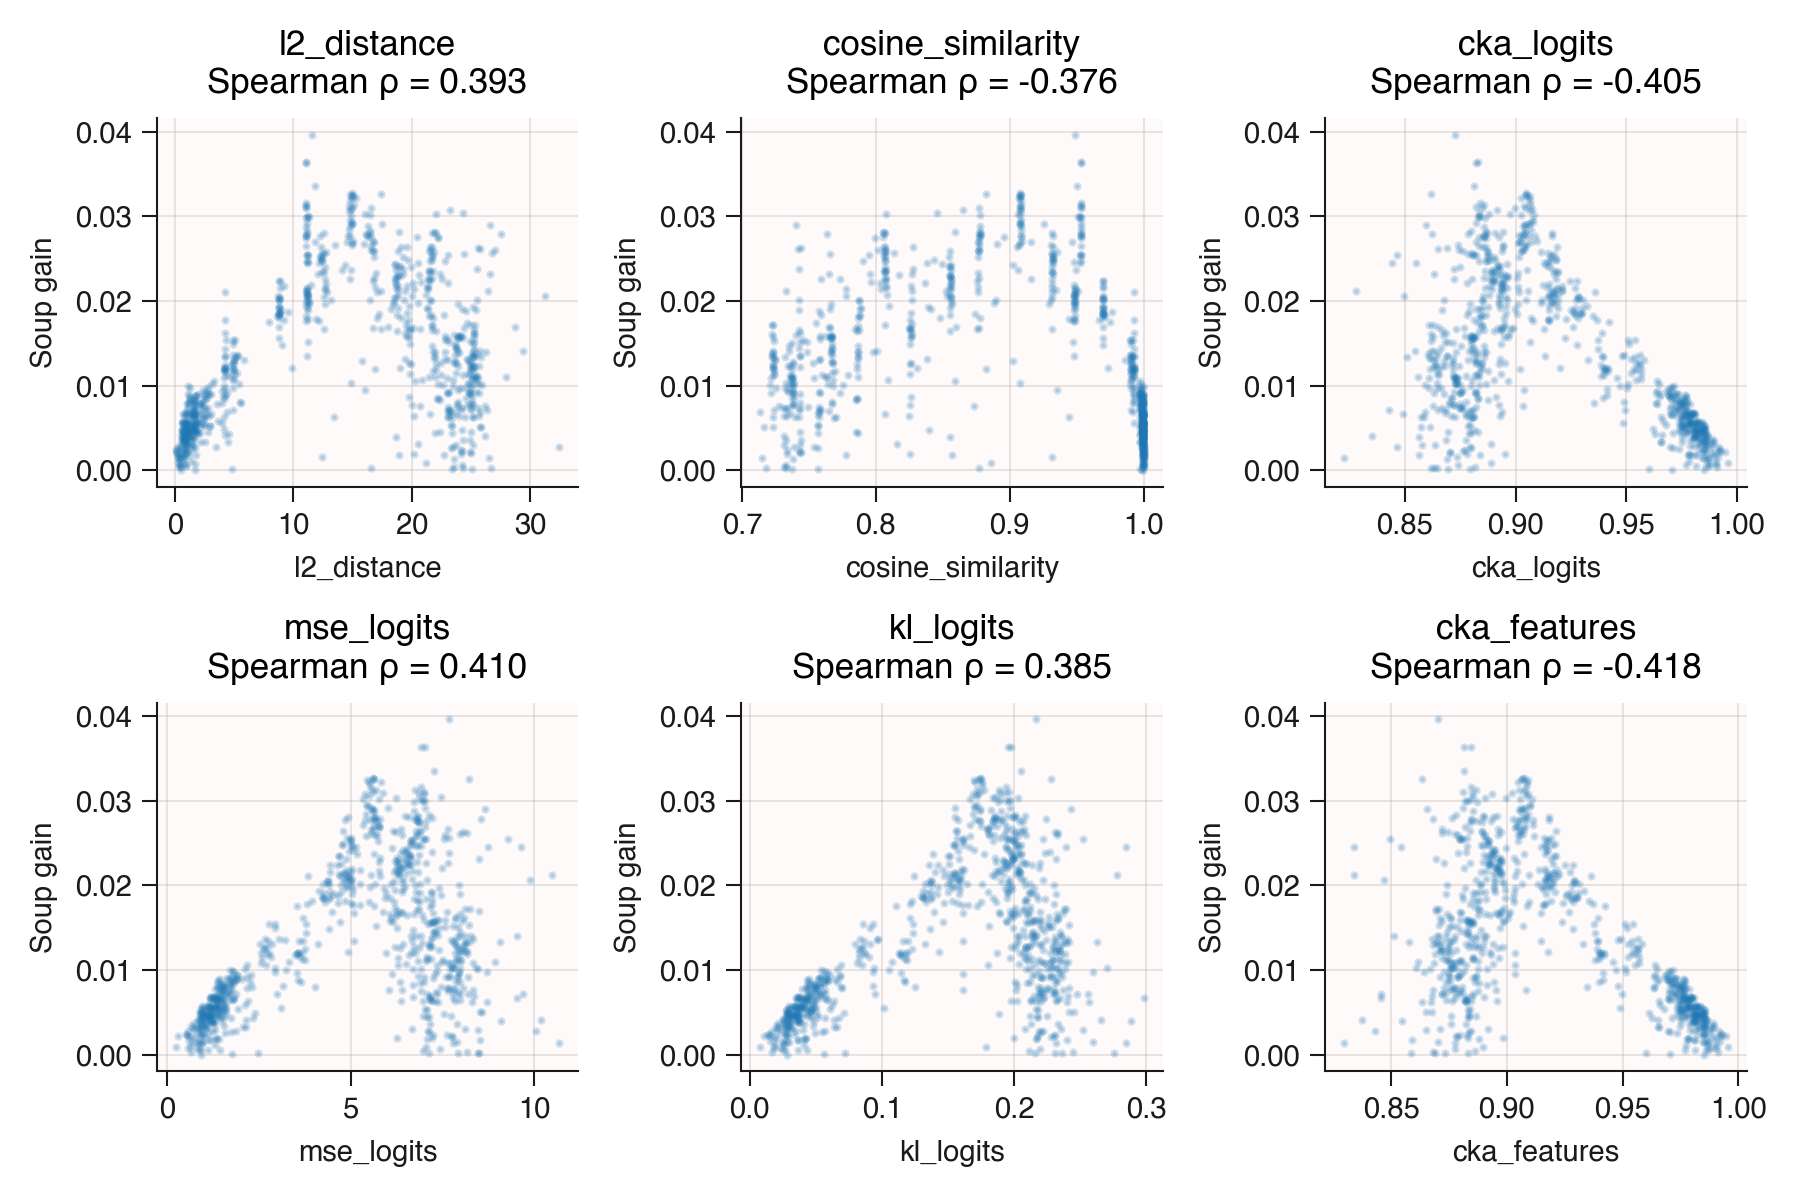

In [19]:
similarity_metrics = [
    'l2_distance',
    'cosine_similarity',
    'cka_logits',
    'mse_logits',
    'kl_logits',
    'cka_features',
]

n = len(similarity_metrics)
cols = 3
rows = (n + cols - 1) // cols

fig, axes = plt.subplots(rows, cols, figsize=(2*cols, 2*rows))
axes = axes.flatten()

soups_pos = soups[soups['soup_gain'] > 0]

for ax, metric in zip(axes, similarity_metrics):
    df = soups_pos[[metric, 'soup_gain']].dropna()
    x = df[metric].to_numpy()
    y = df['soup_gain'].to_numpy()

    pearson_r, pearson_p = pearsonr(x, y)
    spearman_r, spearman_p = spearmanr(x, y)

    ax.scatter(x, y, alpha=0.2, s=1)
    ax.set_xlabel(metric)
    ax.set_ylabel('Soup gain')
    ax.set_title(
        f'{metric}\n'
        f'Spearman ρ = {spearman_r:.3f}'
    )
    ax.grid(True, alpha=0.3)

# Hide any empty axes if metrics don't fill the grid
for ax in axes[len(similarity_metrics):]:
    ax.set_visible(False)

plt.tight_layout()
plt.savefig(f'../report/figures/soup_gain_vs_all_metrics_positive_soups.png', dpi=300)
plt.show()